In [35]:
'''
install the library to download and extract images from MNIST dataset
'''
%pip install get-mnist --user

Note: you may need to restart the kernel to use updated packages.


In [1]:
def true_label(x):
    return label_names[x]

[MNIST] Caching data at FASHION_MNIST
[MNIST] Found http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz in cache.
[MNIST] Found http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz in cache.
[MNIST] Found http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz in cache.
[MNIST] Found http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz in cache.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

this represent a : Sandal


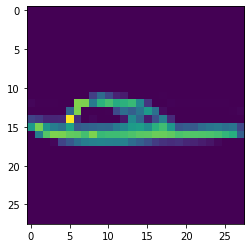

In [2]:
'''
load the dataset
x, y: images and labels for training phase
x_test, y_test: images and label for test phase
'''
from mnist import fashion_mnist
import matplotlib.pyplot as plt
x, y, x_test, y_test = fashion_mnist('FASHION_MNIST')
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)
print('labels:', label_names)

example = 30 # change your image here
g = plt.imshow(x[example])
print('\nthis represent a : ' + true_label(y[example]))

In [3]:
print(x[0])
print(y[0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
    0.  13.  73.   0.   0.   1.   4.   0.   0.   0.   0.   1.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   0.
   36. 136. 127.  62.  54.   0.   0.   0.   1.   3.   4.   0.   0.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.   0.
  102. 204. 176. 134. 144. 123.  23.   0.   0.   0.   0.  12.  10.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  155. 236. 207. 178. 107. 156. 161. 109.  64.  23.  77. 1

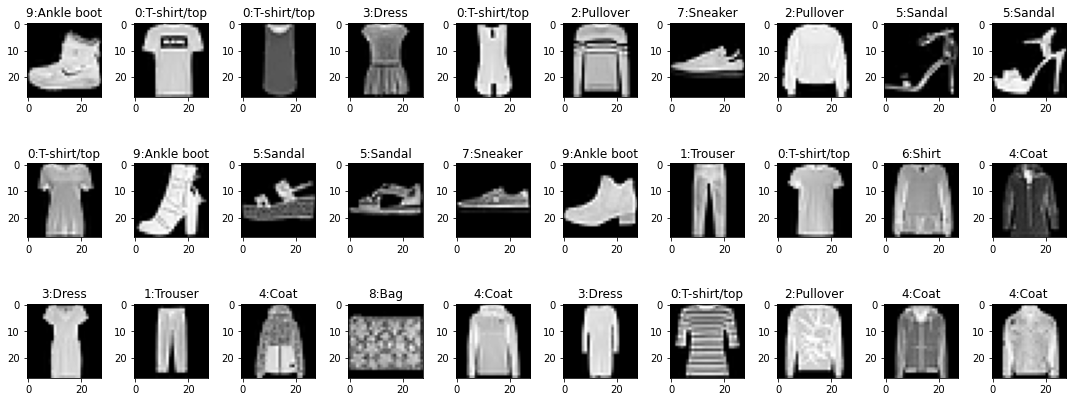

In [4]:
'''
illustrate several images and corresponding labels in the training set
'''

import matplotlib.pyplot as plt

num_row = 3
num_col = 10
num = num_row * num_col

fig, axes = plt.subplots(num_row, num_col,
                        figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x[i], cmap='gray')
    ax.set_title('%d:%s'%(y[i], label_names[y[i]]))
plt.tight_layout()
plt.show()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

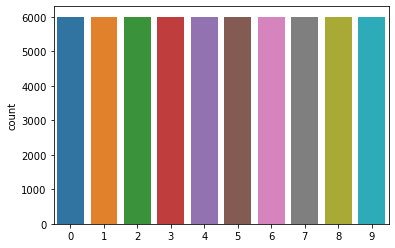

In [5]:
import seaborn as sns
import pandas as pd

df = pd.Series(y)

g = sns.countplot(df)

df.value_counts()

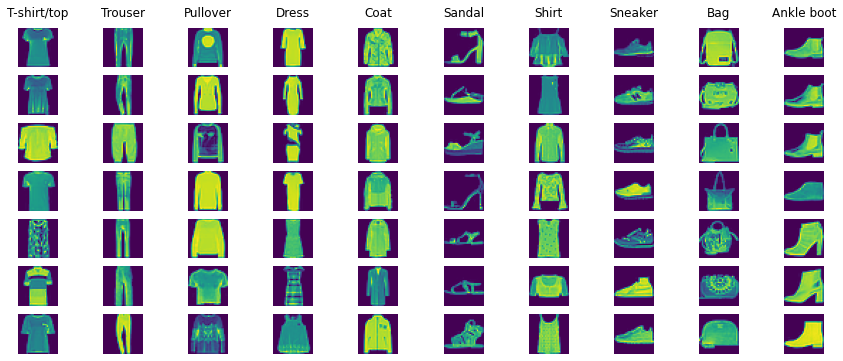

In [6]:
import numpy as np 

def visualize_sample(X_train, y_train, label_names, samples_per_class=7):
    """visualize some samples in the training datasets """ 
    fig, axes = plt.subplots(7, 10, figsize=(1.5*num_col,2*num_row)) # increase space between each image and title
    num_classes = len(label_names)
    for y, cls in enumerate(label_names):
        idxs = np.flatnonzero(y_train == y) # get all the indexes of cls
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs): # plot the image one by one
            plt_idx = i * num_classes + y + 1 # i*num_classes and y+1 determine the row and column respectively
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls, y=1.12)          
    plt.show()
    
visualize_sample(x, y, label_names)

In [7]:
import numpy as np
from keras.utils import to_categorical

num_px = x.shape[1]
x = np.array(x)
x_test = np.array(x_test)


x = (x.reshape(x.shape[0], -1).T) / 255
x_test = (x_test.reshape(x_test.shape[0], -1).T) / 255


print(y_test.shape)
print (y.shape)
print ("x's shape: " + str(x.shape))
print ("x_test's shape: " + str(x_test.shape))

(10000,)
(60000,)
x's shape: (784, 60000)
x_test's shape: (784, 10000)


In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def initialize(dim1):
    w = np.zeros((dim1, 1))*0.01
    b = 0
    return w, b

In [21]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]  

    A = sigmoid((np.dot(w.T, X) + b))
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A)) 
 
    # backwar prop
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [22]:
def optimize(w, b, X, Y, num_iters, alpha, print_cost=False):
    costs = []
    for i in range(num_iters):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - alpha * dw
        b = b - alpha * db
        
        if i % 200 == 0:
            costs.append(cost)


        if print_cost and i % 200 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [23]:
def predict(w, b, X):
    y_pred_sigmoid = sigmoid((np.dot(w.T, X) + b))
    y_pred = np.where( y_pred_sigmoid > 0.5, 1, 0 ) 
    return y_pred

In [24]:
def model(x, y, x_test, y_test, num_iters, alpha, print_cost):
    
    w, b = initialize(x.shape[0])
    parameters, grads, costs = optimize(w, b, x, y, num_iters, alpha, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    y_prediction_train = predict(w, b, x)
    y_prediction_test = predict(w, b, x_test)
    

    print("Train accuracy: %.2f %%"% (np.mean(y_prediction_train == y)*100))
    print("Test accuracy: %.2f %%"% (np.mean(y_prediction_test == y_test)*100))
    

    d = {"costs": costs,
         "Y_prediction_test": y_prediction_test,
         "Y_prediction_train": y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": alpha,
         "num_iterations": num_iters}

    costs = np.squeeze(d['costs']) #cost should be a single value

    return d

In [30]:
import copy

logistic_classifiers=[]
num_classes = np.max(y)+1
costs = []
for i in range(num_classes):
    print ('\nThe %d/%dth logistic regression training...' % (i+1, num_classes))
    y_train_logistic = copy.deepcopy(y)
    idxs_i = y_train_logistic == i
    y_train_logistic[idxs_i] = 1
    y_train_logistic[~idxs_i] = 0
    logistic = model(x, y_train_logistic, x_test, y_test, num_iters = 600, alpha = 0.0075, print_cost = True)
    logistic_classifiers.append(logistic)
    costs.append(logistic["costs"])


The 1/10th logistic regression training...
Cost after iteration 0: 0.693147
Cost after iteration 200: 0.215813
Cost after iteration 400: 0.172761
Train accuracy: 95.22 %
Test accuracy: 3.84 %

The 2/10th logistic regression training...
Cost after iteration 0: 0.693147
Cost after iteration 200: 0.140080
Cost after iteration 400: 0.105481
Train accuracy: 98.58 %
Test accuracy: 18.48 %

The 3/10th logistic regression training...
Cost after iteration 0: 0.693147
Cost after iteration 200: 0.266869
Cost after iteration 400: 0.230332
Train accuracy: 92.03 %
Test accuracy: 9.97 %

The 4/10th logistic regression training...
Cost after iteration 0: 0.693147
Cost after iteration 200: 0.224883
Cost after iteration 400: 0.190571
Train accuracy: 94.71 %
Test accuracy: 10.21 %

The 5/10th logistic regression training...
Cost after iteration 0: 0.693147
Cost after iteration 200: 0.298923
Cost after iteration 400: 0.260491
Train accuracy: 90.48 %
Test accuracy: 9.99 %

The 6/10th logistic regression t

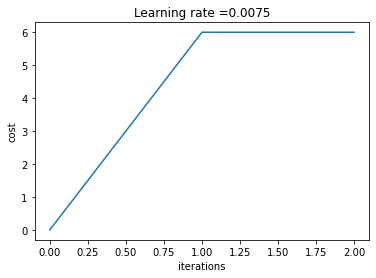

In [68]:
plt.plot(np.argmax(costs, axis=0))
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(logistic["learning_rate"]))
plt.plot()
plt.show()
plt.close()

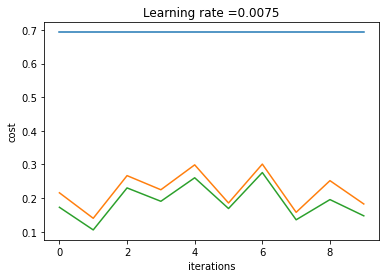

In [67]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(logistic["learning_rate"]))
plt.plot()
plt.show()
plt.close()